In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
df = pd.read_csv("Real_estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.drop("No",axis='columns',inplace=True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# normalizing
X = df.drop("Y house price of unit area", axis='columns')
cols = X.columns
for i in cols:
    df[i] = (df[i] - df[i].mean())/df[i].std()
    
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.822688,1.254111,-0.791537,2.004982,1.124070,0.448220,37.9
1,-0.822688,0.156896,-0.615866,1.665488,0.911342,0.400654,42.2
2,1.539289,-0.387322,-0.413515,0.307513,1.485063,0.687352,47.3
3,1.244928,-0.387322,-0.413515,0.307513,1.485063,0.687352,54.8
4,-1.120595,-1.115873,-0.549332,0.307513,0.833180,0.592220,43.1


In [5]:
X = df.drop("Y house price of unit area", axis='columns')
X = X.to_numpy()
y = df['Y house price of unit area']
y = y.to_numpy()

In [6]:
X[:3]

array([[-0.82268782,  1.25411095, -0.79153734,  2.00498156,  1.12406983,
         0.44821991],
       [-0.82268782,  0.15689638, -0.61586648,  1.66548775,  0.91134153,
         0.40065418],
       [ 1.5392887 , -0.38732204, -0.41351495,  0.30751251,  1.4850633 ,
         0.68735175]])

In [7]:
y[:2]

array([37.9, 42.2])

In [43]:
# X_train = 
# X_test = 
# y_train =
# y_test = 

def costFunction(X,y,weights,bias):  # Computes J ( cost function ) for given (xi,yi) i=1,2..
    total_cost = 0.0  # combined cost of X
    for i in range(len(X)):
        h = np.dot(weights,X[i]) + bias       # hypothesis function
        total_cost += (h - y[i])**2
        
    total_cost = total_cost/(2*len(X))
    return total_cost

def derivative(X,y,weights,bias): # computes derivative for all weigths and  bias
    
    derivative_weights  =  np.zeros(len(X[0]),dtype=float)
    derivative_bias = 0
    
    for i in range(len(weights)):
        for j in range(len(X)):
            derivative_weights[i] += (np.dot(weights,X[j])+bias-y[j])*X[j][i]
        derivative_weights[i] = derivative_weights[i]/len(X)
    
    for i in range(len(X)):
        derivative_bias += (np.dot(weights,X[i])+bias-y[i])
    derivative_bias = derivative_bias/(len(X))
    
    return derivative_weights,derivative_bias
    
    
def gradientDescent(X,y,weights,bias,learning_rate = 0.1 ,epochs=100): # returns paramters for which J is minimized loss
    
    
    
    iteration = []
    cost = []
    
    for i in range(epochs):
        
        derivative_weights,derivative_bias = derivative(X,y,weights,bias)
        
        for j in range(len(weights)):
            weights[j] = weights[j] - learning_rate * ( derivative_weights[j]  )
#         w = w  - learning_rate * ( derivative_weights )
        bias = bias  - learning_rate * ( derivative_bias )
        
        
        
        cost.append( costFunction(X, y, weights, bias))
    for i in range(epochs):
        iteration.append(i)
#             print("Iteration:",i,"   Cost:",cost[-1])
    cost = np.array(cost)
    return weights,bias,cost,iteration
    

In [9]:
# just to check it's working
weights = np.zeros(len(X[0]),dtype=float)  # intializing weights to 0
bias = 0 # initializing bias to 0
cost = [] 
final_weights,final_bias,cost,iteration = gradientDescent(X,y,weights,bias,0.1)

In [10]:
print(final_weights)
print(final_bias)

[ 1.42198127 -3.08065965 -5.05561365  3.45770311  2.94449744  0.2518529 ]
37.97918442965332


In [44]:
print("final cost:",(cost**0.5)[-1])

final cost: 6.210141592664069


In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)

from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X)
mean_squared_error(y, y_pred, squared=False)

[ 1.45106756 -3.07250122 -5.66366768  3.33813717  2.79816395 -0.19066728]
37.98019323671087


8.78246646460277

# K-Fold Cross-Validation

In [13]:
import random

def k_fold(df,k):  # returns df  of k - folds
    fold_size = int ( len(df) / k ) # flooring down
    df_copy  = df.copy() 
    
    folds = []  #  will store dataframes
    for i in range(k):
        new_df = pd.DataFrame(columns=df.columns)
        
        
        for j in range(fold_size):
            #selecting random row and adding it to the new_df
            rowidx  =  random.randint(0, len(df_copy)-1)
            new_df = pd.concat([new_df,df_copy.iloc[rowidx:rowidx+1,:]])
            # droping the row and resetting the index 
            df_copy.drop(index = rowidx, inplace=True)
            df_copy.reset_index(drop=True,inplace = True)
            
                        
        folds.append(new_df)   
    
    return folds 



def cross_validation(df,k): # does cross-validation for a particular k and returns mean-rmse for k-folds
    rmse_scores = [] # stores rmse 
    folds = k_fold(df,k)  # data frame
    


    for i in range(len(folds)):
        df_test = folds[i] # adding 1 fold out of k for testing
        
        df_train = pd.DataFrame(columns=df.columns)
        for j in range(len(folds)): # adding all other (k-1) folds to the training set
            if(i!=j):
                df_train = pd.concat([df_train,folds[j]])
        
        

                
        X_train = df_train.drop("Y house price of unit area", axis='columns')
        y_train = df_train['Y house price of unit area']
        
        X_test = df_test.drop("Y house price of unit area", axis='columns')
        y_test = df_test['Y house price of unit area']
        
        X_train = X_train.to_numpy()
        y_train = y_train.to_numpy()
        
        X_test = X_test.to_numpy()
        y_test = y_test.to_numpy()
        
#         print("train",len(X_train),len(y_train))
#         print("test",len(X_test),len(y_test))
        
        # train (k-1) and test on 1 
        weights = np.zeros(len(X_train[0]),dtype=float)  #  intializing weights to 0 
        bias = 0
        
        # implementing gradient - descent 
        final_w,final_b,cost,iteration = gradientDescent(X_train,y_train,weights,bias,0.1,100)
        print("Test:",costFunction(X_test,y_test,final_w,final_b)**0.5,"  Train:",costFunction(X_train,y_train,final_w,final_b)**0.5)
        
        rmse_scores.append(costFunction(X_test,y_test,final_w,final_b)**0.5)
        
        
        
    rmse_scores = np.array(rmse_scores)
    
    print(rmse_scores.mean())
    return rmse_scores.mean(),folds

In [14]:
data_fold = []
mean_rmse = []
k = []
for i in range(2,6):
    print(i," fold ")
    avg_rmse,folds = cross_validation(df,i)
    
    mean_rmse.append(avg_rmse)
    data_fold.append(folds)
    k.append(i)
    
mean_rmse = np.array(mean_rmse)

2  fold 
Test: 5.547424937907714   Train: 6.894364100592306
Test: 7.137426931205407   Train: 5.311585944931174
6.342425934556561
3  fold 
Test: 6.897086721161202   Train: 5.8966186759075825
Test: 6.075601865720504   Train: 6.319782260563245
Test: 6.069008415777271   Train: 6.325230764033523
6.347232334219659
4  fold 
Test: 5.6753186223663095   Train: 6.4098912073381324
Test: 8.023234961948528   Train: 5.543351908873287
Test: 5.662201337638568   Train: 6.407791334568256
Test: 5.458888983371133   Train: 6.464974860866211
6.204910976331134
5  fold 
Test: 6.11680265580341   Train: 6.204480254398208
Test: 5.994714112380914   Train: 6.229891081825792
Test: 8.400010715727873   Train: 5.511482474056971
Test: 5.529011012889732   Train: 6.341433515334171
Test: 4.608699934196728   Train: 6.521386684998778
6.1298476861997315


In [15]:
print(k)
print(mean_rmse)

optimal_k = k[np.argmin(mean_rmse,axis=0)]
optimal_fold = data_fold[np.argmin(mean_rmse,axis=0)]
optimal_k

[2, 3, 4, 5]
[6.34242593 6.34723233 6.20491098 6.12984769]


5

# RMSE vs Iteration




In [16]:
def gradientDescentwithVal(X,y,X_test,y_test,w,b,learning_rate = 0.1 ,epochs=1001): # returns paramters for which J is minimized loss
    
    iteration = []
    cost = []
    val_cost = []
    
    for i in range(epochs):
        
        derivative_weights,derivative_bias = derivative(X,y,w,b)
        
        for j in range(len(w)):
            w[j] = w[j] - learning_rate * ( derivative_weights[j]  )
#         w = w  - learning_rate * ( derivative_weights )
        b = b  - learning_rate * ( derivative_bias )
    
        cost.append( costFunction(X, y, w, b) )
        val_cost.append(costFunction(X_test,y_test,w,b))
        if(i%50==0):
                print("Test:",costFunction(X_test,y_test,w,b),"  Train:",costFunction(X,y,w,b))
        
    for i in range(epochs):
        iteration.append(i)
        
    cost = np.array(cost)
    val_cost = np.array(val_cost)
    return w,b,cost,iteration,val_cost
    
    
def rmse_iteration(df,k,data):
    RMSE_train = [] # 2-d , stores rmse for diff models ith stores rmse values for ith fold 
    folds = data  # data frame
    RMSE_val = []
    
    
    
    for i in range(len(folds)):
        rmse_values = []
        
        df_test = folds[i]
        df_train = pd.DataFrame(columns=df.columns)
        for j in range(len(folds)):
            if(i!=j):
                df_train = pd.concat([df_train,folds[j]])
        
        

                
        X_train = df_train.drop("Y house price of unit area", axis='columns')
        y_train = df_train['Y house price of unit area']
        
        X_test = df_test.drop("Y house price of unit area", axis='columns')
        y_test = df_test['Y house price of unit area']
        
        X_train = X_train.to_numpy()
        y_train = y_train.to_numpy()
        
        X_test = X_test.to_numpy()
        y_test = y_test.to_numpy()
        
        print("train",len(X_train),len(y_train))
        print("test",len(X_test),len(y_test))
        
        weights = np.zeros(len(X_train[0]),dtype=float)  #  intializing weights to 0 
        bias = 0
        final_w,final_b,cost,iteration,val_cost = gradientDescentwithVal(X_train,y_train,X_test,y_test,weights,bias,0.01,300)
        print("Test:",costFunction(X_test,y_test,final_w,final_b),"  Train:",costFunction(X_train,y_train,final_w,final_b))
        
        RMSE_train.append(cost**0.5)
        RMSE_val.append(val_cost**0.5)
        
    
    
    return RMSE_train,RMSE_val,iteration





In [48]:
train,val,iteration = rmse_iteration(df,optimal_k,optimal_fold)

train 328 328
test 82 82
Test: 813.3762121372843   Train: 790.1414862054176
Test: 310.7824494834148   Train: 301.0669480892777
Test: 139.33715893742658   Train: 133.8055922923177
Test: 76.77361635543161   Train: 73.47960471665856
Test: 53.29480903734599   Train: 51.46572581006342
Test: 44.258781618486815   Train: 43.391272966832055
Test: 40.70270212797173   Train: 40.446522624684825
train 328 328
test 82 82
Test: 841.7757670472805   Train: 783.2057079069278
Test: 323.3602824387018   Train: 302.07317496482096
Test: 143.26110178041674   Train: 136.10387285221518
Test: 76.59330172333576   Train: 75.43245816888043
Test: 51.33478840366103   Train: 52.920089370124415
Test: 41.62807611571016   Train: 44.474634364585896
Test: 37.9033848724677   Train: 41.2929463308772
train 328 328
test 82 82
Test: 811.5169215036465   Train: 790.5757416511165
Test: 314.36177273649656   Train: 297.70863075843727
Test: 152.18726626004698   Train: 127.68470508141822
Test: 96.90035060272285   Train: 66.14193810051

In [49]:
Train_rmse = []
Val_rmse = []

for i in range(optimal_k):
    Train_rmse.append(train[i].sum()/len(train[i]))
    Val_rmse.append(val[i].sum()/len(val[i]))
    
print(Train_rmse)
print(Val_rmse)

# [11.250674119925282, 11.318781013856622, 10.861319807493073, 11.31957926863306, 11.509218797410457]
# [11.433863858427225, 11.485190662915757, 12.449814857705526, 11.317908557422205, 9.832271648413279]

[11.250674119925282, 11.318781013856622, 10.861319807493073, 11.31957926863306, 11.509218797410457]
[11.433863858427225, 11.485190662915757, 12.449814857705526, 11.317908557422205, 9.832271648413279]


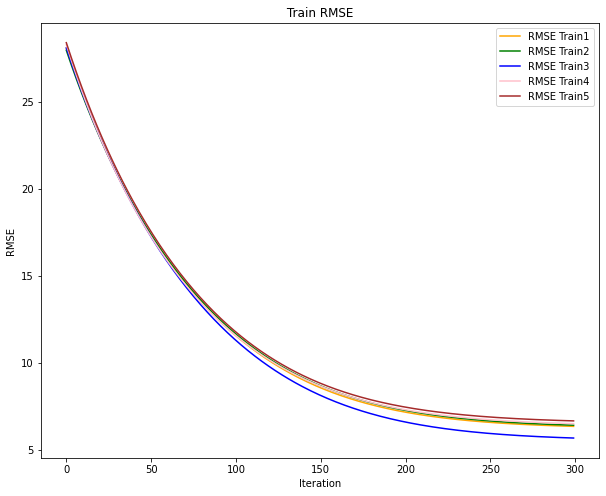

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
c = ['orange','green','blue','pink','brown','yellow','violet']
for i in range(optimal_k):
    plt.plot(iteration,train[i],color=c[i] ,label= "RMSE Train"+str(i+1))
    
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("RMSE ")
plt.title(" Train RMSE ")
plt.show()

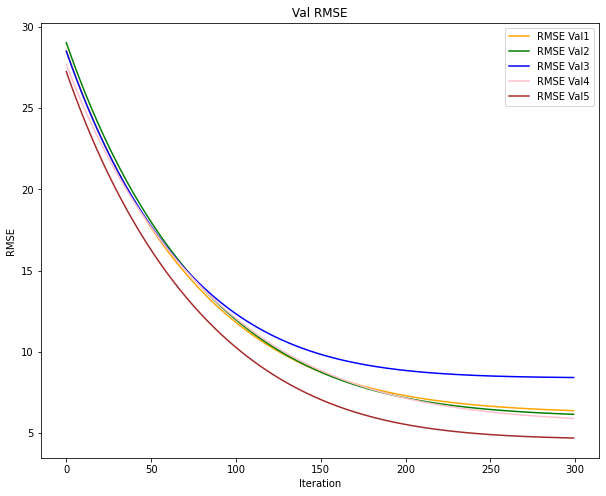

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
c = ['orange','green','blue','pink','brown','yellow','violet']
for i in range(optimal_k):
    plt.plot(iteration,val[i],color=c[i] ,label= "RMSE Val"+str(i+1))
    
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("RMSE ")
plt.title(" Val RMSE ")
plt.show()

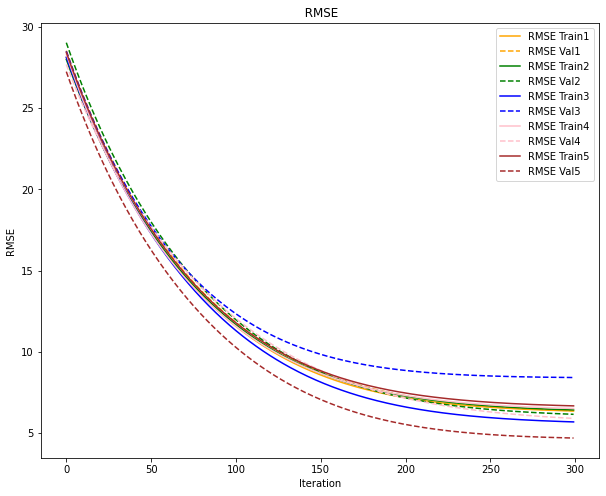

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
c = ['orange','green','blue','pink','brown','yellow','violet']
for i in range(optimal_k):
    plt.plot(iteration,train[i],color=c[i] ,label= "RMSE Train"+str(i+1))
    plt.plot(iteration,val[i],color=c[i] ,label= "RMSE Val"+str(i+1),linestyle='--')
    
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("RMSE ")
plt.title("  RMSE ")
plt.show()

# Ridge


In [131]:
def rmse_iteration_Ridge(df,k,data,alpha):
    RMSE_train = [] # 2-d , stores rmse for diff models ith stores rmse values for ith fold 
    folds = data  # data frame
    RMSE_val = []
    
    
    
    for i in range(len(folds)):
        rmse_values = []
        
        df_test = folds[i]
        df_train = pd.DataFrame(columns=df.columns)
        for j in range(len(folds)):
            if(i!=j):
                df_train = pd.concat([df_train,folds[j]])
        
        

                
        X_train = df_train.drop("Y house price of unit area", axis='columns')
        y_train = df_train['Y house price of unit area']
        
        X_test = df_test.drop("Y house price of unit area", axis='columns')
        y_test = df_test['Y house price of unit area']
        
        X_train = X_train.to_numpy()
        y_train = y_train.to_numpy()
        
        X_test = X_test.to_numpy()
        y_test = y_test.to_numpy()
        
      
        weights = np.zeros(len(X_train[0]),dtype=float)  #  intializing weights to 0 
        bias = 0
        final_w,final_b,cost,iteration,val_cost = Ridgeval(X_train,y_train,X_test,y_test,weights,bias,alpha,300)
#         print("Test:",costFunction(X_test,y_test,final_w,final_b),"  Train:",costFunction(X_train,y_train,final_w,final_b))
        
        RMSE_train.append(cost**0.5)
        RMSE_val.append(val_cost**0.5)
        
    
    
    return RMSE_train,RMSE_val,iteration



def rmse_iteration_Lasso(df,k,data,alpha):
    RMSE_train = [] # 2-d , stores rmse for diff models ith stores rmse values for ith fold 
    folds = data  # data frame
    RMSE_val = []
    
    
    
    for i in range(len(folds)):
        rmse_values = []
        
        df_test = folds[i]
        df_train = pd.DataFrame(columns=df.columns)
        for j in range(len(folds)):
            if(i!=j):
                df_train = pd.concat([df_train,folds[j]])
        
        

                
        X_train = df_train.drop("Y house price of unit area", axis='columns')
        y_train = df_train['Y house price of unit area']
        
        X_test = df_test.drop("Y house price of unit area", axis='columns')
        y_test = df_test['Y house price of unit area']
        
        X_train = X_train.to_numpy()
        y_train = y_train.to_numpy()
        
        X_test = X_test.to_numpy()
        y_test = y_test.to_numpy()
        
  
        
        weights = np.zeros(len(X_train[0]),dtype=float)  #  intializing weights to 0 
        bias = 0
        final_w,final_b,cost,iteration,val_cost = Lassoval(X_train,y_train,X_test,y_test,weights,bias,alpha,300)
#         print("Test:",costFunction(X_test,y_test,final_w,final_b),"  Train:",costFunction(X_train,y_train,final_w,final_b))
        
        RMSE_train.append(cost**0.5)
        RMSE_val.append(val_cost**0.5)
        
    
    
    return RMSE_train,RMSE_val,iteration

In [115]:
def Ridge_derivative(X,y,weight,bias,alpha): # computes derivative for all weigths and  bias
    
    derivative_weights  =  np.zeros(len(X[0]),dtype=float)
    derivative_bias = 0
    
    for i in range(len(weight)):
        for j in range(len(X)):
            derivative_weights[i] += (np.dot(weight,X[j])+bias-y[j])*X[j][i]
        derivative_weights[i] = derivative_weights[i]/len(X) + ( alpha * weight[i] )  # main 
    
    for i in range(len(X)):
        derivative_bias += (np.dot(weight,X[i])+bias-y[i])
    derivative_bias = derivative_bias/(len(X))
    
    return derivative_weights,derivative_bias


def Ridge(X,y,weight,bias,learning_rate = 0.1 ,epochs=1001,alpha = 0.1): # returns paramters for which J is minimized loss
    
    
    
    iteration = []
    cost = []
    for i in range(epochs):
        
        derivative_weights,derivative_bias = Ridge_derivative(X,y,weight,bias,alpha)
        
        for j in range(len(weight)):
            weight[j] = weight[j] - learning_rate * ( derivative_weights[j]  ) 
#         w = w  - learning_rate * ( derivative_weights )
        bias = bias  - learning_rate * ( derivative_bias )
        cost.append( costFunction(X, y, weight, bias))
        
    for i in range(epochs):
        iteration.append(i)   

#             print("Iteration:",i,"   Cost:",cost[-1])
    cost = np.array(cost)
    return weight,bias,cost,iteration

def Ridgeval(X_train,y_train,X_test,y_test,weight,bias,learning_rate = 0.1 ,epochs=1001,alpha = 0.1): # returns paramters for which J is minimized loss
    
    
    
    iteration = []
    cost = []
    valcost = []
    
    for i in range(epochs):
        
        derivative_weights,derivative_bias = Ridge_derivative(X,y,weight,bias,alpha)
        
        for j in range(len(weight)):
            weight[j] = weight[j] - learning_rate * ( derivative_weights[j]  ) 
#         w = w  - learning_rate * ( derivative_weights )
        bias = bias  - learning_rate * ( derivative_bias )
        cost.append( costFunction(X_train, y_train, weight, bias))
        valcost.append(costFunction(X_test, y_test, weight, bias))
        
    for i in range(epochs):
        iteration.append(i)   

#             print("Iteration:",i,"   Cost:",cost[-1])
    cost = np.array(cost)
    valcost = np.array(valcost)
    return weight,bias,cost,iteration,valcost

In [116]:
# just checking
weights = np.zeros(len(X[0]),dtype=float)  # randomly intializing weights 
bias = 0
cost = []
final_weights,final_bias,cost,iteration = Ridge(X,y,weights,bias,0.1,1001,0)

In [117]:
print(final_weights)
print(final_bias)

print(cost)

[ 1.45106752 -3.07250123 -5.66366692  3.33813732  2.79816414 -0.19066673]
37.9801932367109
[654.03013217 530.5851843  433.705674   ...  38.5658586   38.5658586
  38.5658586 ]


Training Loss 28.488510147291098 Val Loss 28.481641352708422


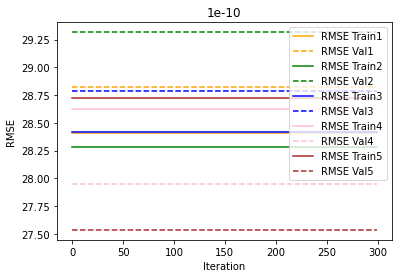

Training Loss 28.44354944192559 Val Loss 28.436693744651187


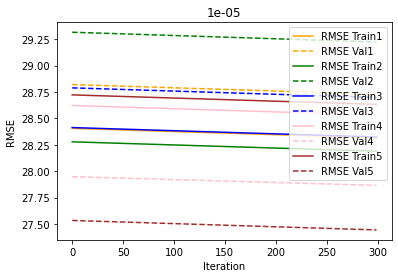

Training Loss 11.252379207804287 Val Loss 11.202643846600195


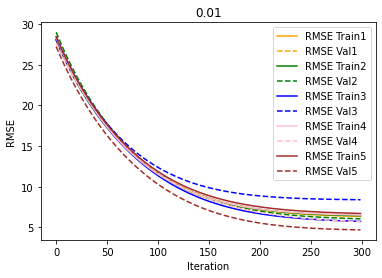

Training Loss 6.644296350947398 Val Loss 6.531781188126423


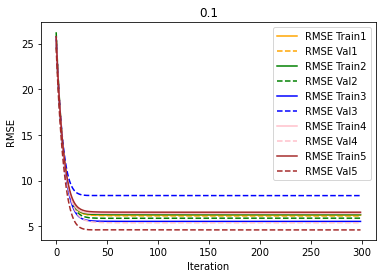

Training Loss 8.718416059558455e+72 Val Loss 8.678528481053292e+72


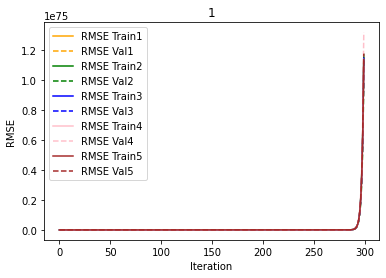

In [123]:
reg_parameters = [1e-10,0.00001,0.01,0.1,1]
for j in range(len(reg_parameters)):
    train,val,iteration = rmse_iteration_Ridge(df,optimal_k,optimal_fold,reg_parameters[j])
    train = np.array(train)
    val = np.array(val)
    print("Training Loss",train.mean(),"Val Loss",val.mean())
    
    c = ['orange','green','blue','pink','brown','yellow','violet']
    for i in range(optimal_k):
        plt.plot(iteration,train[i],color=c[i] ,label= "RMSE Train"+str(i+1))
        plt.plot(iteration,val[i],color=c[i] ,label= "RMSE Val"+str(i+1),linestyle='--')

    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("RMSE ")
    plt.title(str(reg_parameters[j]))
    plt.show()

# Lasso

In [126]:
def Lasso_derivative(X,y,weight,bias,alpha): # computes derivative for all weigths and  bias
    
    derivative_weights  =  np.zeros(len(X[0]),dtype=float)
    derivative_bias = 0
    
    for i in range(len(weight)):
        for j in range(len(X)):
            derivative_weights[i] += (np.dot(weight,X[j])+bias-y[j])*X[j][i]
        
        derivative_weights[i] = derivative_weights[i]/len(X) + ( alpha * -1 )
    
    for i in range(len(X)):
        derivative_bias += (np.dot(weight,X[i])+bias-y[i])
    derivative_bias = derivative_bias/(len(X))
    
    return derivative_weights,derivative_bias


def Lasso(X,y,weight,bias,learning_rate = 0.1 ,epochs=1001,alpha = 0.1): # returns paramters for which J is minimized loss
    
    
    
    iteration = []
    cost = []
    
    for i in range(epochs):
        
        derivative_weights,derivative_bias = Lasso_derivative(X,y,weight,bias,alpha)
        
        for j in range(len(weight)):
            weight[j] = weight[j] - learning_rate * ( derivative_weights[j]  ) 
#         w = w  - learning_rate * ( derivative_weights )
        bias = bias  - learning_rate * ( derivative_bias )
        
        
        
        
        cost.append( costFunction(X, y, weight, bias))
    for i in range(epochs):
        iteration.append(i)
#             print("Iteration:",i,"   Cost:",cost[-1])
    cost = np.array(cost)
    return weight,bias,cost,iteration

def Lassoval(X_train,y_train,X_test,y_test,weight,bias,learning_rate = 0.1 ,epochs=1001,alpha = 0.1): # returns paramters for which J is minimized loss
    
    
    
    iteration = []
    cost = []
    valcost = []
    for i in range(epochs):
        
        derivative_weights,derivative_bias = Lasso_derivative(X,y,weight,bias,alpha)
        
        for j in range(len(weight)):
            weight[j] = weight[j] - learning_rate * ( derivative_weights[j]  ) 
#         w = w  - learning_rate * ( derivative_weights )
        bias = bias  - learning_rate * ( derivative_bias )
        
        
        
        valcost.append(costFunction(X_test, y_test, weight, bias))
        cost.append( costFunction(X, y, weight, bias))
    for i in range(epochs):
        iteration.append(i)
#             print("Iteration:",i,"   Cost:",cost[-1])
    cost = np.array(cost)
    valcost = np.array(valcost)
    return weight,bias,cost,iteration,valcost

In [127]:
#Just checking
weights = np.zeros(len(X[0]),dtype=float)  # randomly intializing weights 
bias = 0
cost = []
final_weights,final_bias,cost,iteration = Lasso(X,y,weights,bias,0.1,100,1)

In [128]:
print(final_weights)
print(final_bias)
print(cost)

[ 2.10626068 -2.25094794  1.71857105  5.45429184  5.04079014  4.81589432]
37.979184429694016
[653.24718695 529.72455797 433.07293101 356.60403592 295.63660247
 246.77346016 207.4742299  175.79419536 150.2184217  129.55188157
 112.84359154  99.33220083  88.40568499  79.57071036  72.42889216
  66.65813354  61.99781168  58.23693691  55.20464395  52.76253222
  50.79848263  49.22165949  47.95846685  46.94927489  46.14576903
  45.5088025   45.00665675  44.61363197  44.30890506  44.07560437
  43.90005984  43.77119556  43.6800375   43.61931469  43.58313599
  43.56672831  43.56622443  43.57849112  43.60098982  43.63166386
  43.66884697  43.71118927  43.75759719  43.80718488  43.85923479
  43.91316578  43.96850721  44.02487802  44.08196976  44.13953278
  44.19736514  44.25530356  44.31321609  44.37099618  44.42855792
  44.48583208  44.54276301  44.59930605  44.65542547  44.71109281
  44.76628548  44.82098569  44.87517954  44.92885632  44.98200787
  45.03462816  45.08671288  45.13825911  45.18926

Training Loss 28.523537165778418 Val Loss 28.481641352394192


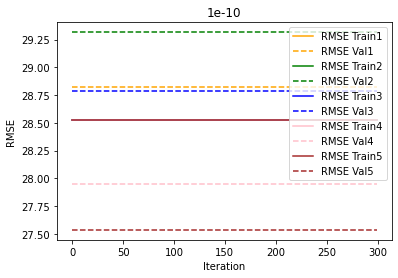

Training Loss 28.478691589021164 Val Loss 28.436661839880212


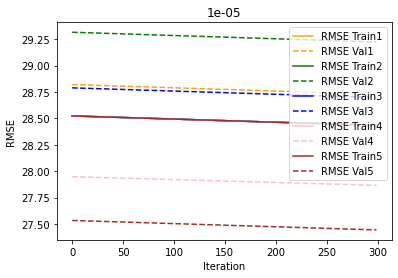

Training Loss 11.309647563287392 Val Loss 11.190094400882371


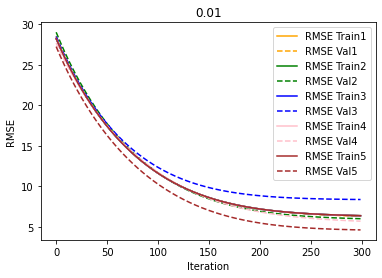

Training Loss 6.679329888835969 Val Loss 6.518107538905866


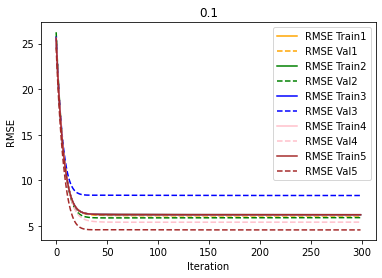

Training Loss 2.5617861756312435e+65 Val Loss 2.546039349890721e+65


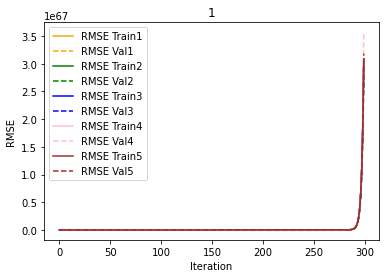

In [132]:
reg_parameters = [1e-10,0.00001,0.01,0.1,1]
for j in range(len(reg_parameters)):
    train,val,iteration = rmse_iteration_Lasso(df,optimal_k,optimal_fold,reg_parameters[j])
    train = np.array(train)
    val = np.array(val)
    print("Training Loss",train.mean(),"Val Loss",val.mean())
    
    c = ['orange','green','blue','pink','brown','yellow','violet']
    for i in range(optimal_k):
        plt.plot(iteration,train[i],color=c[i] ,label= "RMSE Train"+str(i+1))
        plt.plot(iteration,val[i],color=c[i] ,label= "RMSE Val"+str(i+1),linestyle='--')

    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("RMSE ")
    plt.title(str(reg_parameters[j]))
    plt.show()

# Normal Equation

In [39]:
def cross_validation_normal(df,k,optimal_fold):
    rmse_scores = [] # stores rmse 
    rmse_train = []
    folds = optimal_fold  # data frame
    
                                
    
    for i in range(len(folds)):
        df_test = folds[i]
        df_train = pd.DataFrame(columns=df.columns)
        for j in range(len(folds)):
            if(i!=j):
                df_train = pd.concat([df_train,folds[j]])
        
        

                
        X_train = df_train.drop("Y house price of unit area", axis='columns')
        y_train = df_train['Y house price of unit area']
        X_test = df_test.drop("Y house price of unit area", axis='columns')
        y_test = df_test['Y house price of unit area']
        
        X_train = (X_train.to_numpy()).astype(float) # this is done for matrix multiplication
        y_train = y_train.to_numpy().astype(float)
        X_test = X_test.to_numpy().astype(float)
        y_test = y_test.to_numpy().astype(float)
        
        
        X_train = np.insert(X_train,0,1,axis = 1)
        X_test = np.insert(X_test,0,1,axis = 1)
        
        weights = np.dot(np.dot(np.linalg.inv(np.matmul(X_train.T,(X_train))),(X_train.T)),y_train)  # randomly intializing weights 
        print("parameters ",weights)
    
        rmse_scores.append(cost_normal(X_test,y_test,weights))
        rmse_train.append(cost_normal(X_train,y_train,weights))
        
    rmse_scores = np.array(rmse_scores)**0.5
    rmse_train = np.array(rmse_train)**0.5
    
    print(rmse_scores)               
    return rmse_scores,rmse_train       

                                 
                                
        
def cost_normal(X,y,weights):
#         X = np.insert(X,0,1,axis = 1)
        total_cost = 0.0  # combined cost of X
        for i in range(len(X)):
            h = np.dot(weights,X[i])      # hypothesis function
            total_cost += (h - y[i])**2

        total_cost = total_cost/(2*len(X))
        return total_cost
        

In [40]:
val_rmse,train_rmse = (cross_validation_normal(df,optimal_k,optimal_fold))

parameters  [37.80131746  1.62497447 -2.95105794 -5.22239377  3.36447817  2.77157906
  0.27059843]
parameters  [37.82789152  1.26849959 -3.19859219 -5.97588543  3.76131895  2.50163901
 -0.630053  ]
parameters  [38.13964776  1.25161843 -2.98466677 -4.83004171  3.8401526   2.73535196
  0.52473551]
parameters  [37.57190963  1.40604985 -3.25534056 -6.02788809  3.22878947  3.02326485
 -0.35547711]
parameters  [38.01703891  1.71066568 -3.14725314 -5.5858798   3.2139537   2.82166056
 -0.1881152 ]
[6.09854557 6.02923906 8.3755801  5.5557193  4.60776613]


In [41]:
print(val_rmse)

[6.09854557 6.02923906 8.3755801  5.5557193  4.60776613]
